Number of duplicate samples: 3854
Number of samples with missing values: 0
Number of rows (samples) after preprocessing: 96146

Number of rows (samples) after adjustment: 96146


Results for the Training Set:
Accuracy: 0.9994502392202312

Confusion Matrix:

[[61397     0]
 [   37  5868]]

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61397
         1.0       1.00      0.99      1.00      5905

    accuracy                           1.00     67302
   macro avg       1.00      1.00      1.00     67302
weighted avg       1.00      1.00      1.00     67302


Results for the Test Set:
Accuracy: 0.9498682568298433

Confusion Matrix:

[[25479   788]
 [  658  1919]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     26267
         1.0       0.71      0.74      0.73      2577

    accuracy                           0.95     28844
   macro 

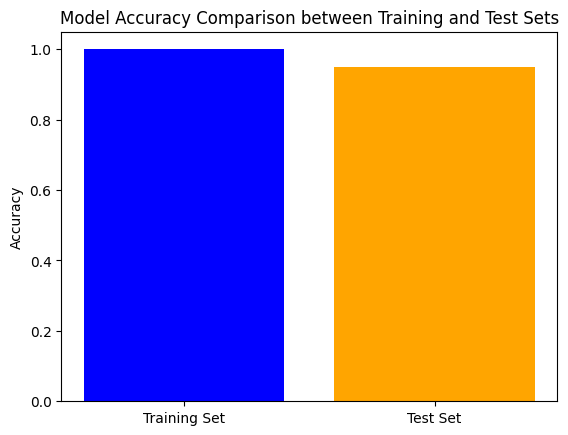

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Read the dataset
file_path = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Data preprocessing
# Check for duplicate samples
df_duplicates = df[df.duplicated()]
print(f"Number of duplicate samples: {len(df_duplicates)}")

# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
df_missing_values = df[df.isnull().any(axis=1)]
print(f"Number of samples with missing values: {len(df_missing_values)}")

# Handle missing values
# Fill missing numeric values with the mean and missing categorical values with the most frequent value
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])
df[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])

# Handle non-numeric categories using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']  # Add all categorical columns here
df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

# Print the number of rows (samples) after preprocessing
print(f"Number of rows (samples) after preprocessing: {len(df)}\n")

# Adjust the number of samples
# num_samples_to_keep = 90000 # ADJUST HERE
# df = df.head(num_samples_to_keep)

# Print the number of rows (samples) after adjustment
print(f"Number of rows (samples) after adjustment: {len(df)}\n\n")

# Split the data into features and target
X = df.drop('diabetes', axis=1)  # Diabetes is the target column
y = df['diabetes']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Decision Tree Algorithm
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Display results for the training set
print("Results for the Training Set:")
print(f"Accuracy: {accuracy_train}\n")
print(f"Confusion Matrix:\n\n{conf_matrix_train}\n")
print(f"Classification Report:\n\n{class_report_train}\n")

# Display results for the test set
print("Results for the Test Set:")
print(f"Accuracy: {accuracy_test}\n")
print(f"Confusion Matrix:\n\n{conf_matrix_test}\n")
print(f"Classification Report:\n\n{class_report_test}\n")

# Plotting a bar graph for accuracy comparison
fig, ax = plt.subplots()
labels = ['Training Set', 'Test Set']
accuracy_values = [accuracy_train, accuracy_test]
ax.bar(labels, accuracy_values, color=['blue', 'orange'])
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison between Training and Test Sets')
plt.show()

Results for the Regularized Training Set:
Accuracy: 0.9706398026804552

Confusion Matrix:

[[61397     0]
 [ 1976  3929]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     61397
         1.0       1.00      0.67      0.80      5905

    accuracy                           0.97     67302
   macro avg       0.98      0.83      0.89     67302
weighted avg       0.97      0.97      0.97     67302


Results for the Regularized Test Set:
Accuracy: 0.9710511718208293

Confusion Matrix:

[[26267     0]
 [  835  1742]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     26267
         1.0       1.00      0.68      0.81      2577

    accuracy                           0.97     28844
   macro avg       0.98      0.84      0.90     28844
weighted avg       0.97      0.97      0.97     28844




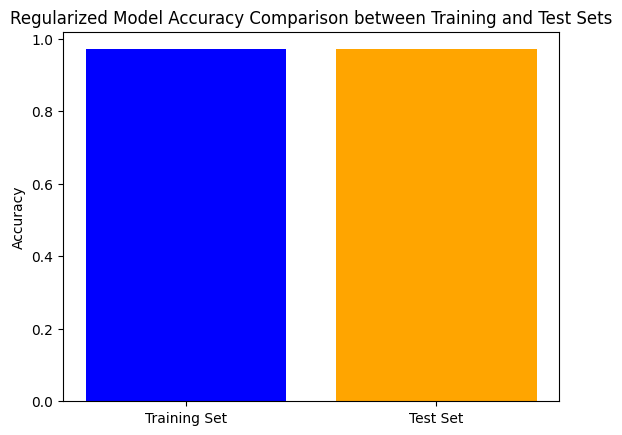

In [2]:
# Apply Decision Tree Algorithm with regularization
# Adjust these hyperparameters based on the dataset and requirements
model_regularized = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
model_regularized.fit(X_train, y_train)

# Predict on the test set
y_pred_train_regularized = model_regularized.predict(X_train)
y_pred_test_regularized = model_regularized.predict(X_test)

# Evaluate the regularized model on the training set
accuracy_train_regularized = accuracy_score(y_train, y_pred_train_regularized)
conf_matrix_train_regularized = confusion_matrix(y_train, y_pred_train_regularized)
class_report_train_regularized = classification_report(y_train, y_pred_train_regularized)

# Evaluate the regularized model on the test set
accuracy_test_regularized = accuracy_score(y_test, y_pred_test_regularized)
conf_matrix_test_regularized = confusion_matrix(y_test, y_pred_test_regularized)
class_report_test_regularized = classification_report(y_test, y_pred_test_regularized)

# Display results for the regularized model on the training set
print("Results for the Regularized Training Set:")
print(f"Accuracy: {accuracy_train_regularized}\n")
print(f"Confusion Matrix:\n\n{conf_matrix_train_regularized}\n")
print(f"Classification Report:\n\n{class_report_train_regularized}\n")

# Display results for the regularized model on the test set
print("Results for the Regularized Test Set:")
print(f"Accuracy: {accuracy_test_regularized}\n")
print(f"Confusion Matrix:\n\n{conf_matrix_test_regularized}\n")
print(f"Classification Report:\n\n{class_report_test_regularized}\n")

# Plotting a bar graph for accuracy comparison
fig, ax = plt.subplots()
labels = ['Training Set', 'Test Set']
accuracy_values_regularized = [accuracy_train_regularized, accuracy_test_regularized]
ax.bar(labels, accuracy_values_regularized, color=['blue', 'orange'])
ax.set_ylabel('Accuracy')
ax.set_title('Regularized Model Accuracy Comparison between Training and Test Sets')
plt.show()

Number of duplicate samples: 3854
Number of samples with missing values: 0
Number of rows (samples) after preprocessing: 96146

Number of rows (samples) after adjustment: 96146


Results for the Training Set:
Accuracy: 0.9614721702178242

Confusion Matrix:

[[61164   233]
 [ 2360  3545]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     61397
         1.0       0.94      0.60      0.73      5905

    accuracy                           0.96     67302
   macro avg       0.95      0.80      0.86     67302
weighted avg       0.96      0.96      0.96     67302


Results for the Test Set:
Accuracy: 0.9511163500208015

Confusion Matrix:

[[26051   216]
 [ 1194  1383]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     26267
         1.0       0.86      0.54      0.66      2577

    accuracy                           0.95     28844
   macro 

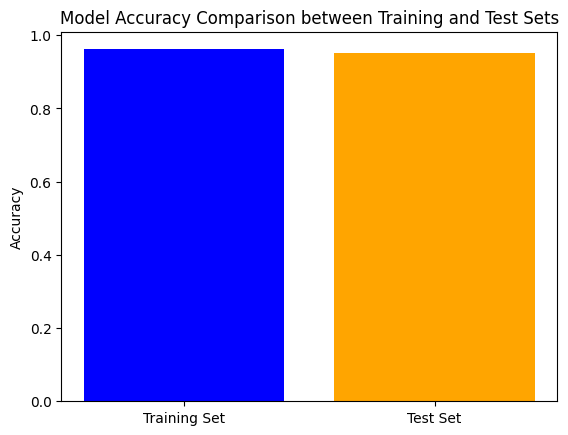

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Read the dataset
file_path = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Data preprocessing
# Check for duplicate samples
df_duplicates = df[df.duplicated()]
print(f"Number of duplicate samples: {len(df_duplicates)}")

# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
df_missing_values = df[df.isnull().any(axis=1)]
print(f"Number of samples with missing values: {len(df_missing_values)}")

# Handle missing values
# Fill missing numeric values with the mean and missing categorical values with the most frequent value
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])
df[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])

# Handle non-numeric categories using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']  # Add all categorical columns here
df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

# Print the number of rows (samples) after preprocessing
print(f"Number of rows (samples) after preprocessing: {len(df)}\n")

# Adjust the number of samples
# num_samples_to_keep = 90000 # ADJUST HERE
# df = df.head(num_samples_to_keep)

# Print the number of rows (samples) after adjustment
print(f"Number of rows (samples) after adjustment: {len(df)}\n\n")

# Split the data into features and target
X = df.drop('diabetes', axis=1)  # Diabetes is the target column
y = df['diabetes']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply K-Nearest Neighbors Algorithm
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Display results for the training set
print("Results for the Training Set:")
print(f"Accuracy: {accuracy_train}\n")
print(f"Confusion Matrix:\n\n{conf_matrix_train}\n")
print(f"Classification Report:\n\n{class_report_train}\n")

# Display results for the test set
print("Results for the Test Set:")
print(f"Accuracy: {accuracy_test}\n")
print(f"Confusion Matrix:\n\n{conf_matrix_test}\n")
print(f"Classification Report:\n\n{class_report_test}\n")

# Plotting a bar graph for accuracy comparison
fig, ax = plt.subplots()
labels = ['Training Set', 'Test Set']
accuracy_values = [accuracy_train, accuracy_test]
ax.bar(labels, accuracy_values, color=['blue', 'orange'])
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison between Training and Test Sets')
plt.show()

Results for the Training Set:
Accuracy: 0.945543966003982

Confusion Matrix:

[[61390     7]
 [ 3658  2247]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     61397
         1.0       1.00      0.38      0.55      5905

    accuracy                           0.95     67302
   macro avg       0.97      0.69      0.76     67302
weighted avg       0.95      0.95      0.93     67302


Results for the Test Set:
Accuracy: 0.9457426154486201

Confusion Matrix:

[[26264     3]
 [ 1562  1015]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     26267
         1.0       1.00      0.39      0.56      2577

    accuracy                           0.95     28844
   macro avg       0.97      0.70      0.77     28844
weighted avg       0.95      0.95      0.93     28844




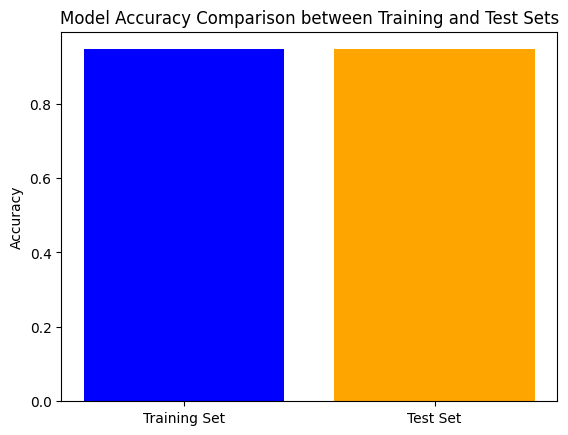

In [4]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled = X_test

# Adjust the number of neighbors
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Display results for the training set
print("Results for the Training Set:")
print(f"Accuracy: {accuracy_train}\n")
print(f"Confusion Matrix:\n\n{conf_matrix_train}\n")
print(f"Classification Report:\n\n{class_report_train}\n")

# Display results for the test set
print("Results for the Test Set:")
print(f"Accuracy: {accuracy_test}\n")
print(f"Confusion Matrix:\n\n{conf_matrix_test}\n")
print(f"Classification Report:\n\n{class_report_test}\n")

# Plotting a bar graph for accuracy comparison
fig, ax = plt.subplots()
labels = ['Training Set', 'Test Set']
accuracy_values = [accuracy_train, accuracy_test]
ax.bar(labels, accuracy_values, color=['blue', 'orange'])
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison between Training and Test Sets')
plt.show()